In [1]:
import yt
from PIL import Image, ImageDraw

In [153]:
ds = yt.load('./output/output-shell_simple_2d/solution/solution-00004.pvtu')

yt : [INFO     ] 2021-07-23 15:27:23,792 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-07-23 15:27:23,792 Parameters: domain_dimensions         = [1 1]
yt : [INFO     ] 2021-07-23 15:27:23,793 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-07-23 15:27:23,793 Parameters: domain_right_edge         = [6.336e+06 6.336e+06 1.000e+00]
yt : [INFO     ] 2021-07-23 15:27:23,794 Parameters: cosmological_simulation   = 0


In [154]:
ds.field_list

[('all', 'T'),
 ('all', 'p'),
 ('all', 'velocity_x'),
 ('all', 'velocity_y'),
 ('all', 'velocity_z'),
 ('connect0', 'T'),
 ('connect0', 'p'),
 ('connect0', 'velocity_x'),
 ('connect0', 'velocity_y'),
 ('connect0', 'velocity_z')]

In [155]:
ad = ds.all_data()

In [156]:
ad[('all','T')]

unyt_array([[1429.43652344, 1491.63562012, 1605.81811523, 1531.76098633],
            [1491.63562012, 1649.70507812, 1787.66674805, 1605.81811523],
            [1531.76098633, 1605.81811523, 1737.35192871, 1655.16345215],
            ...,
            [4722.88427734, 4715.97412109, 4701.09863281, 4707.75878906],
            [4713.52880859, 4707.75878906, 4673.96191406, 4679.24658203],
            [4707.75878906, 4701.09863281, 4668.59619141, 4673.96191406]], 'K')

yt : [INFO     ] 2021-07-23 15:27:29,026 xlim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:27:29,027 ylim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:27:29,030 xlim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:27:29,031 ylim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:27:29,033 Making a fixed resolution buffer of (('all', 'T')) 800 by 800



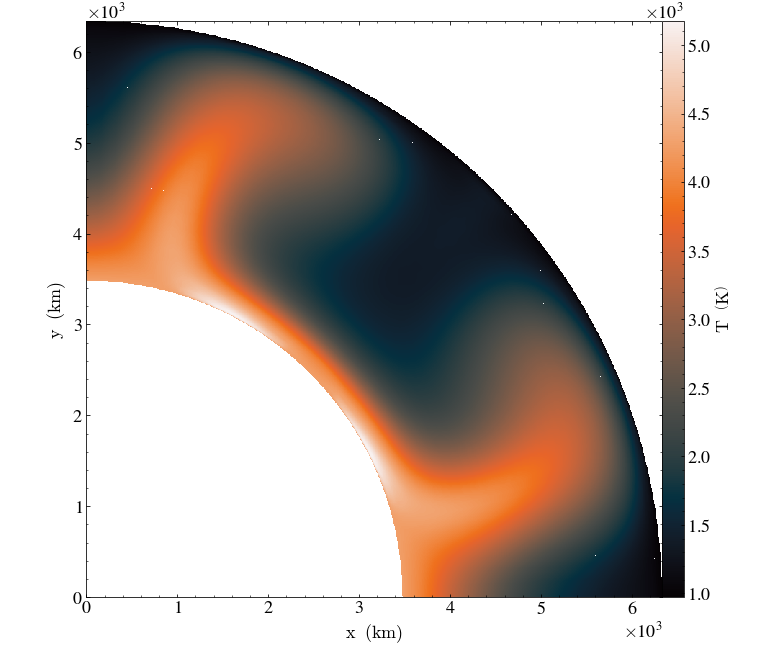

In [157]:
p = yt.SlicePlot(ds,'z',('all','T'), origin='native')
p.set_cmap(('all','T'), 'dusk')
p.show()

p = yt.SlicePlot(ds,'z',('all','T'), origin='native')
p.set_cmap(('all','T'), 'RdGy_r')
p.show()

In [162]:
# the yt slices

clrs = {
    'default': {
                 'velo':(0.5, 0.5, 0.5, 1.),
                 'mesh':(1.,1.,1.,0.6)
               },
    'RdGy_r': {
                 'velo':(0.5, 0.5, 0.5, 1.),
                 'mesh':(0,0,0,1)
#                  'mesh':(0.7,0.7,0.7,0.5)
               },
    
}
def get_slice(cmap='dusk'):
    p = yt.SlicePlot(ds,'z',('all','T'), origin='native', buff_size=(1200, 1200))
    p.set_cmap(('all','T'), cmap)    
    p.set_figure_size(50)
#     p.set_font_size(20)
    p.set_font({"family": "sans-serif", "size": 70})
    return p



def generate_slices_and_composite(c):
    fnames = ['shell_'+c+'_without_mesh',
              'shell_'+c+'_with_mesh']
    
    
    if c in clrs:
        velo_clr = clrs[c]['velo']
        mesh_clr = clrs[c]['mesh']
    else:
        velo_clr = clrs['default']['velo']
        mesh_clr = clrs['default']['mesh']
        
    # the yt slices
    p1 = get_slice(c)  
    p1.annotate_velocity(factor=20, normalize=True, plot_args={"color": velo_clr})
    p1.save(fnames[0])

    p2 = get_slice(c)  
    p2.annotate_mesh_lines(plot_args={"color": mesh_clr})
    p2.save(fnames[1])
    
    # re-open the images as a stack
    imstack  = [Image.open(fn+'_Slice_z_T.png') for fn in fnames]

    # init the mask 
    mode = "L"
    mask = Image.new(mode, imstack[0].size, 0) 

    # use draw.polygon to mask a triangular section
    draw = ImageDraw.Draw(mask)
    draw.polygon([(imstack[0].size[0],0), (0,imstack[0].size[1]), (0,0), (imstack[0].size[0],0)],fill=255)
    im_combo = Image.composite(imstack[0], imstack[1], mask)

    # create a final image to paste into with white background
    final_image = Image.new('RGBA', im_combo.size, color=(255, 255, 255, 255)) 
    final_image.paste(im_combo, mask=im_combo.split()[3])

    # save it
    final_image.save('shell_composite_'+c+'.png')
    return final_image
    
    


In [163]:
for c in ['dusk', 'RdGy_r']:
    generate_slices_and_composite(c)
# for c in ['dusk', 'magma', 'inferno', 'RED TEMPERATURE']:
#     generate_slices_and_composite(c)
    
# for c in ['PuOr','RdGy', 'cubehelix']:
#     generate_slices_and_composite(c)
#     generate_slices_and_composite(c+'_r')

yt : [INFO     ] 2021-07-23 15:39:40,237 xlim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:39:40,238 ylim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:39:40,239 xlim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:39:40,240 ylim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:39:40,242 Making a fixed resolution buffer of (('all', 'T')) 1200 by 1200
yt : [WARNING  ] 2021-07-23 15:39:41,218 Ignoring supplied suffix '.png' in favour of '.png'
yt : [INFO     ] 2021-07-23 15:39:41,218 Saving plot shell_dusk_without_mesh_Slice_z_T.png
yt : [INFO     ] 2021-07-23 15:39:43,219 xlim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:39:43,220 ylim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:39:43,221 xlim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:39:43,221 ylim = 0.000000 6336000.000000
yt : [INFO     ] 2021-07-23 15:39:43,222 Making a fixed resolution buffer of (('all', 'T')) 1200 by 1200
yt : [WARNING  ] 2021-07-23 15

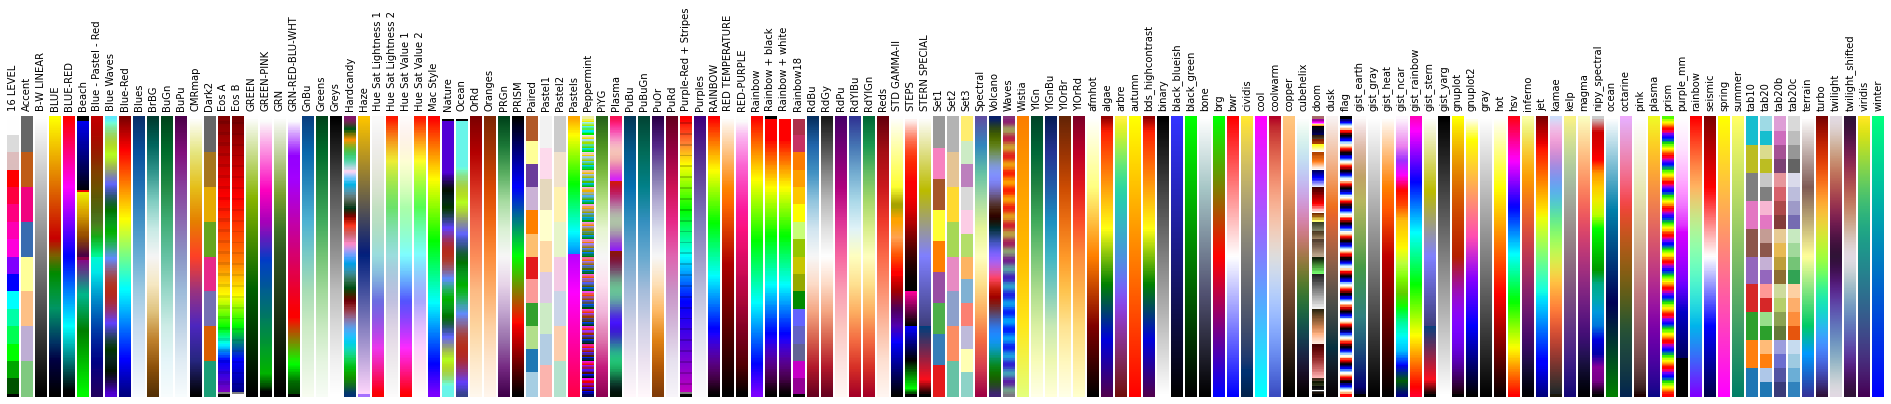

In [143]:
yt.show_colormaps()